In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn import metrics as mt
import statsmodels.api as sm
import scipy.stats as sts
import math


In [2]:

donnee = pd.read_csv('./DonnВesEspViev0r3.csv')
donnee.shape

(2573, 13)

In [3]:
donnee.head()

,Population,PIB par capita ($ US),IMC (Indice Masse Corporelle),%-immunisation Hépatite B,Polio immunisation (%),Diphthérie et tétanos (%-immunisation),Rougeole (cas par 1000 habitants),VIH/Sida (cas par 1000 habitants),"Prévalence malnutrition (1-19 ans, %)","Prévalence malnutrition (5-9 ans, %)",Facteur de revenu,Nombre d'années d'études,Espérance de vie (années)
0,33736494.0,584.259210,19.1,65.0,6.0,65.0,1154,0.1,17.2,17.3,0.479,10.1,65.0
1,327582.0,612.696514,18.6,62.0,58.0,62.0,492,0.1,17.5,17.5,0.476,10.0,59.9
2,31731688.0,631.744976,18.1,64.0,62.0,64.0,430,0.1,17.7,17.7,0.470,9.9,59.9
3,3696958.0,669.959000,17.6,67.0,67.0,67.0,2787,0.1,17.9,18.0,0.463,9.8,59.5
4,2978599.0,63.537231,17.2,68.0,68.0,68.0,3013,0.1,18.2,18.2,0.454,9.5,59.2


In [10]:
donnee.describe()

,Population,PIB par capita ($ US),IMC (Indice Masse Corporelle),%-immunisation Hépatite B,Polio immunisation (%),Diphthérie et tétanos (%-immunisation),Rougeole (cas par 1000 habitants),VIH/Sida (cas par 1000 habitants),"Prévalence malnutrition (1-19 ans, %)","Prévalence malnutrition (5-9 ans, %)",Facteur de revenu,Nombre d'années d'études,Espérance de vie (années)
count,2.011000e+03,2190.000000,2544.000000,2089.000000,2557.000000,2557.000000,2573.000000,2573.000000,2544.000000,2544.000000,2432.000000,2436.000000,2563.000000
mean,1.277490e+07,7501.973427,38.379953,80.795596,82.685569,82.335941,2434.478430,1.787835,4.850354,4.880307,0.626988,11.994663,69.150917
std,5.784897e+07,14509.333934,20.025567,25.254943,23.310613,23.743696,11565.776279,5.139712,4.434817,4.512919,0.210970,3.347308,9.545666
min,3.400000e+01,1.681350,1.000000,1.000000,3.000000,3.000000,0.000000,0.100000,0.100000,0.100000,0.000000,0.000000,36.300000
25%,1.915815e+05,463.935626,19.400000,77.000000,78.000000,78.000000,0.000000,0.100000,1.600000,1.500000,0.493000,10.100000,63.000000
50%,1.396985e+06,1764.394684,43.500000,92.000000,93.000000,93.000000,16.000000,0.100000,3.350000,3.400000,0.677000,12.300000,72.000000
75%,7.620270e+06,5826.804523,56.100000,97.000000,97.000000,97.000000,352.000000,0.800000,7.200000,7.200000,0.779000,14.200000,75.600000
max,1.179681e+09,119172.741800,87.300000,99.000000,99.000000,99.000000,212183.000000,50.600000,27.700000,28.600000,0.948000,20.700000,89.000000


In [9]:
donnee.isnull().sum()

Population                                562
PIB par capita ($ US)                     383
IMC (Indice Masse Corporelle)              29
%-immunisation Hépatite B                 484
Polio immunisation (%)                     16
Diphthérie et tétanos (%-immunisation)     16
Rougeole (cas par 1000 habitants)           0
VIH/Sida (cas par 1000 habitants)           0
Prévalence malnutrition (1-19 ans, %)      29
Prévalence malnutrition (5-9 ans, %)       29
Facteur de revenu                         141
Nombre d'années d'études                  137
Espérance de vie (années)                  10
dtype: int64

In [15]:
## bcp de nulls. Si on enlève 'seulement' les 562 de 'Population', c'est 25% du dataset
from sklearn.impute import SimpleImputer

def get_df_imputate(pDf=donnee):
    imputer = SimpleImputer(strategy='mean')
    return pd.DataFrame( imputer.fit_transform(pDf), columns = pDf.columns)


In [16]:
newDf = get_df_imputate()
newDf.isnull().sum()

Population                                0
PIB par capita ($ US)                     0
IMC (Indice Masse Corporelle)             0
%-immunisation Hépatite B                 0
Polio immunisation (%)                    0
Diphthérie et tétanos (%-immunisation)    0
Rougeole (cas par 1000 habitants)         0
VIH/Sida (cas par 1000 habitants)         0
Prévalence malnutrition (1-19 ans, %)     0
Prévalence malnutrition (5-9 ans, %)      0
Facteur de revenu                         0
Nombre d'années d'études                  0
Espérance de vie (années)                 0
dtype: int64

In [5]:
## fonction pour séparer les variables dépendantes et indépendantes
def getDfXDfY(pDf=donnee, pColY='Espérance de vie (années)'):
    dfY = pd.DataFrame( pDf[pColY], columns = [pColY])
    dfX = pDf.drop([pColY], axis=1)
    return dfX, dfY

In [18]:
dfX, dfY = getDfXDfY(newDf)

In [21]:
def do_regression(pDfX, pDfY):
    Y=pDfY
    X= pDfX
    modele=sm.OLS(Y,X.assign(const=1))
    resultats=modele.fit()
    Y_chap = resultats.predict(X.assign(const=1))
    #print('[Y_chap]: ', Y_chap)
    print(resultats.summary())

In [22]:
do_regression(dfX, dfY)

                                OLS Regression Results                               
Dep. Variable:     Espérance de vie (années)   R-squared:                       0.769
Model:                                   OLS   Adj. R-squared:                  0.768
Method:                        Least Squares   F-statistic:                     710.0
Date:                       Tue, 21 Mar 2023   Prob (F-statistic):               0.00
Time:                               18:57:47   Log-Likelihood:                -7565.4
No. Observations:                       2573   AIC:                         1.516e+04
Df Residuals:                           2560   BIC:                         1.523e+04
Df Model:                                 12                                         
Covariance Type:                   nonrobust                                         
                                             coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------

/*************/

Q1.1

Le modèle n'est pas valide car il y a des variables dont le p-value > 0.05 (par exemple, 'Prévalence malnutrition (1-19 ans, %)')




/**************/

In [24]:
### Ops... j'ai vu l'obersvation d'eliminer les valeur manquantes après avoir fait l'imputation
newDf = donnee.dropna()
do_regression(dfX, dfY)

                                OLS Regression Results                               
Dep. Variable:     Espérance de vie (années)   R-squared:                       0.769
Model:                                   OLS   Adj. R-squared:                  0.768
Method:                        Least Squares   F-statistic:                     710.0
Date:                       Tue, 21 Mar 2023   Prob (F-statistic):               0.00
Time:                               19:02:27   Log-Likelihood:                -7565.4
No. Observations:                       2573   AIC:                         1.516e+04
Df Residuals:                           2560   BIC:                         1.523e+04
Df Model:                                 12                                         
Covariance Type:                   nonrobust                                         
                                             coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------

/************/

Mais le résultat est semblable dans le sens qu'il y a des valeurs dont le p-values >0.05

/**************/

/****************/

Calcul du vif

/****************/

In [25]:
from statsmodels.stats.outliers_influence import variance_inflation_factor

In [35]:
## Fonction VIF. Optimization plus tard, si le temps me permet
def get_vif(pDfX, pDfY):
    X = pDfX
    Y = pDfY
    VIF = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
    VIFPanda=pd.DataFrame(VIF)
    VIFPanda.index=X.columns
    VIFPanda.columns=["VIF"]

    #modele=sm.OLS(Y,X.assign(const=1))
    #resultats=modele.fit()
    #Y_chap = resultats.predict(X.assign(const=1))
    print(VIFPanda)
    #print(resultats.summary())


In [36]:
get_vif(dfX, dfY)

                                              VIF
Population                               1.194949
PIB par capita ($ US)                    1.648540
IMC (Indice Masse Corporelle)            7.639485
%-immunisation Hépatite B               16.762328
Polio immunisation (%)                  26.469859
Diphthérie et tétanos (%-immunisation)  28.970197
Rougeole (cas par 1000 habitants)        1.150888
VIH/Sida (cas par 1000 habitants)        1.193381
Prévalence malnutrition (1-19 ans, %)   17.866322
Prévalence malnutrition (5-9 ans, %)    17.869089
Facteur de revenu                       30.041449
Nombre d'années d'études                39.986798


/*****************/

Q1.2 

Il y a des valeurs élevé (>20, 25), comme par exemple:

Facteur de revenu                       30.041449
Nombre d'années d'études                39.986798


/*****************/

/******************/

Q1.3 - élimination des variables avec vif élevé

/*******************/

In [40]:
dfX.columns

Index(['Population', 'PIB par capita ($ US)', 'IMC (Indice Masse Corporelle)',
       '%-immunisation Hépatite B', 'Polio immunisation (%)',
       'Diphthérie et tétanos (%-immunisation)',
       'Rougeole (cas par 1000 habitants)',
       'VIH/Sida (cas par 1000 habitants)',
       'Prévalence malnutrition (1-19 ans, %)',
       'Prévalence malnutrition (5-9 ans, %)', 'Facteur de revenu',
       'Nombre d'années d'études'],
      dtype='object')

In [46]:
## éliminons quelques une d'un coup
cols_excl=['Facteur de revenu'
, "Nombre d'années d'études" 
, 'Diphthérie et tétanos (%-immunisation)'
#, 'Polio immunisation (%)'
, 'Prévalence malnutrition (5-9 ans, %)'
, '%-immunisation Hépatite B'
]

dfX2 = dfX.drop(cols_excl, axis=1)

In [47]:
do_regression(dfX2, dfY)

                                OLS Regression Results                               
Dep. Variable:     Espérance de vie (années)   R-squared:                       0.645
Model:                                   OLS   Adj. R-squared:                  0.644
Method:                        Least Squares   F-statistic:                     667.1
Date:                       Tue, 21 Mar 2023   Prob (F-statistic):               0.00
Time:                               19:17:21   Log-Likelihood:                -8116.3
No. Observations:                       2573   AIC:                         1.625e+04
Df Residuals:                           2565   BIC:                         1.630e+04
Df Model:                                  7                                         
Covariance Type:                   nonrobust                                         
                                            coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------

/*************/

Q1.3
Le R2 du modèle est moins bon (0.645 vs 0.769 avant) mais toutes les variables ont un p-value < 0.05

/***************/

/****************/

Q1.4 - stadardisation

/***************/

In [48]:
from sklearn.preprocessing import StandardScaler

In [49]:
def get_scaled_df(pDfX):
    scaler = StandardScaler()
    return pd.DataFrame(scaler.fit_transform(pDfX), columns = pDfX.columns)

In [50]:
do_regression(get_scaled_df(dfX2), dfY)

                                OLS Regression Results                               
Dep. Variable:     Espérance de vie (années)   R-squared:                       0.645
Model:                                   OLS   Adj. R-squared:                  0.644
Method:                        Least Squares   F-statistic:                     667.1
Date:                       Tue, 21 Mar 2023   Prob (F-statistic):               0.00
Time:                               19:23:00   Log-Likelihood:                -8116.3
No. Observations:                       2573   AIC:                         1.625e+04
Df Residuals:                           2565   BIC:                         1.630e+04
Df Model:                                  7                                         
Covariance Type:                   nonrobust                                         
                                            coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------

/*************/

Q1.4
Je dirais que les coefficients font du sens car l'espérance de vie augmente lorsque
- rougeole
- SIDA
- malnutrition

réduisent


/**********/

/**********************/

Questions 2.*

/*************************/

In [104]:
#df2 = pd.read_csv('./Restaurationv0r1.csv', index_col='Items')
df2 = pd.read_csv('./Restaurationv0r1.csv')

In [105]:
df2.head()

,Items,Calories,Matières Grasses (g),Carbohydrates (g),Fibres (g),Protéines (g),Type
0,8-Grain Roll,350,8.0,67,5,10,Boulangerie
1,Apple Bran Muffin,350,9.0,64,7,6,Boulangerie
2,Apple Fritter,420,20.0,59,0,5,Boulangerie
3,Banana Nut Loaf,490,19.0,75,4,7,Boulangerie
4,Birthday Cake Mini Doughnut,130,6.0,17,0,0,Boulangerie


In [72]:
df2.shape

(77, 7)

In [106]:
len(df2.columns)

7

In [107]:
###
# Q 2.1 - On se sert de la fonction utilisée avant. On obtient séparément les vars dépendantes
# et indépendates
# 
###
dfX, dfY = getDfXDfY(df2, 'Items')

In [108]:
dfX['Type'].unique()

array(['Boulangerie', 'Bistro', 'Collation', 'Déjeuner chaud', 'Salade',
       'Sandwich', 'Parfait'], dtype=object)

In [111]:
## Q2.1 - pour la standardisation, il faut transformer 'Type' en numérique
nominal_cols = ['Type']
dfNumeriqueX = pd.get_dummies(data=dfX, prefix = nominal_cols, columns=nominal_cols, drop_first=True)
#dfNumeriqueX = pd.get_dummies(data=df2, prefix = nominal_cols, columns=nominal_cols, drop_first=True)

In [112]:

## la fonction est mal nommée, en fait elle standardise
stdDfX = get_scaled_df(dfNumeriqueX)

stdDfX.head()

,Calories,Matières Grasses (g),Carbohydrates (g),Fibres (g),Protéines (g),Type_Boulangerie,Type_Collation,Type_Déjeuner chaud,Type_Parfait,Type_Salade,Type_Sandwich
0,0.106693,-0.817991,1.345788,1.324069,0.064717,0.937043,-0.363803,-0.340503,-0.201347,-0.114708,-0.316228
1,0.106693,-0.676132,1.163348,2.276903,-0.433606,0.937043,-0.363803,-0.340503,-0.201347,-0.114708,-0.316228
2,0.775383,0.884315,0.859282,-1.058018,-0.558187,0.937043,-0.363803,-0.340503,-0.201347,-0.114708,-0.316228
3,1.444073,0.742456,1.832293,0.847652,-0.309025,0.937043,-0.363803,-0.340503,-0.201347,-0.114708,-0.316228
4,-1.994905,-1.101709,-1.694871,-1.058018,-1.181091,0.937043,-0.363803,-0.340503,-0.201347,-0.114708,-0.316228


/**************/

Q 2.2 - analyse PCA

/***************/

In [78]:
from sklearn.decomposition import PCA

In [125]:

def do_pca(pDfX, pClass, pColor ):
    "Directement des fonctions"
    
    X = pDfX
    Yclass = pClass

    a=2
    pca = PCA(n_components=a)
    pca.fit(X)
    VarianceCapturee=pca.explained_variance_ratio_
    X_pca_mean=pca.mean_
    T=pca.transform(X)
    P=pca.components_

    print ('-----Q2.2 - loadings & scores ---')
    print("---Loadings---")
    print(P)

    print("---Scores---")    
    print(T)
    print('--------------------------')



    T1=np.dot((X.values-X_pca_mean),P[0,:])
    T2=np.dot((X.values-X_pca_mean),P[1,:])
    Xest=pca.inverse_transform(T)


    TPanda=pd.DataFrame(T)
    TPanda.index=X.index
    TPanda.columns=['T1','T2']
    T_resultats=pd.concat([TPanda,Yclass],axis=1)

    PPanda=pd.DataFrame(P.T)
    PPanda.index=X.columns
    PPanda.columns=['PC1','PC2']

    PPanda.plot.bar()

    import plotnine as p9

    print ('-----Q2.3 - graphique coleur selon \'Type\' ---')

    graph = p9.ggplot(data=T_resultats,
           mapping=p9.aes(x='T1', y='T2', color=pColor))

    #graph = p9.ggplot(data=T_resultats,
    #       mapping=p9.aes(x='T1', y='T2', color='Type'))


    print(graph + p9.geom_point())
    print('--------------------------')



In [127]:
stdDfX

,Calories,Matières Grasses (g),Carbohydrates (g),Fibres (g),Protéines (g),Type_Boulangerie,Type_Collation,Type_Déjeuner chaud,Type_Parfait,Type_Salade,Type_Sandwich
0,0.106693,-0.817991,1.345788,1.324069,0.064717,0.937043,-0.363803,-0.340503,-0.201347,-0.114708,-0.316228
1,0.106693,-0.676132,1.163348,2.276903,-0.433606,0.937043,-0.363803,-0.340503,-0.201347,-0.114708,-0.316228
2,0.775383,0.884315,0.859282,-1.058018,-0.558187,0.937043,-0.363803,-0.340503,-0.201347,-0.114708,-0.316228
3,1.444073,0.742456,1.832293,0.847652,-0.309025,0.937043,-0.363803,-0.340503,-0.201347,-0.114708,-0.316228
4,-1.994905,-1.101709,-1.694871,-1.058018,-1.181091,0.937043,-0.363803,-0.340503,-0.201347,-0.114708,-0.316228
...,...,...,...,...,...,...,...,...,...,...,...
72,0.775383,-0.108697,0.068711,1.800486,2.805495,-1.067187,-0.363803,-0.340503,-0.201347,-0.114708,3.162278
73,0.488801,-0.108697,-0.539421,-0.105183,3.054656,-1.067187,-0.363803,-0.340503,-0.201347,-0.114708,3.162278
74,-0.370943,-0.250556,-0.052915,-1.058018,-0.184444,-1.067187,-0.363803,-0.340503,4.966555,-0.114708,-0.316228
75,-0.370943,-1.385426,0.737656,0.371234,0.064717,-1.067187,-0.363803,-0.340503,4.966555,-0.114708,-0.316228


In [128]:
#do_pca(stdDfX, pClass=dfY)
concatDf = pd.concat([stdDfX, dfX['Type']], axis=1)
concatDf.head()

,Calories,Matières Grasses (g),Carbohydrates (g),Fibres (g),Protéines (g),Type_Boulangerie,Type_Collation,Type_Déjeuner chaud,Type_Parfait,Type_Salade,Type_Sandwich,Type
0,0.106693,-0.817991,1.345788,1.324069,0.064717,0.937043,-0.363803,-0.340503,-0.201347,-0.114708,-0.316228,Boulangerie
1,0.106693,-0.676132,1.163348,2.276903,-0.433606,0.937043,-0.363803,-0.340503,-0.201347,-0.114708,-0.316228,Boulangerie
2,0.775383,0.884315,0.859282,-1.058018,-0.558187,0.937043,-0.363803,-0.340503,-0.201347,-0.114708,-0.316228,Boulangerie
3,1.444073,0.742456,1.832293,0.847652,-0.309025,0.937043,-0.363803,-0.340503,-0.201347,-0.114708,-0.316228,Boulangerie
4,-1.994905,-1.101709,-1.694871,-1.058018,-1.181091,0.937043,-0.363803,-0.340503,-0.201347,-0.114708,-0.316228,Boulangerie


-----Q2.2 - loadings & scores ---
---Loadings---
[[-0.54113938 -0.34583516 -0.40629283 -0.25183107 -0.27171805 -0.22533772
   0.42500696  0.0392422   0.04974735  0.17402234 -0.1397721 ]
 [-0.0207031  -0.00090257 -0.30495665  0.26341198  0.5396502  -0.54971029
  -0.01468192  0.29160599  0.01611136  0.0185131   0.39740467]]
---Scores---
[[-1.03756646 -0.76826837]
 [-1.1170523  -0.73069242]
 [-1.02133694 -1.59890607]
 [-2.27706751 -1.27291194]
 [ 2.37160017 -1.09700415]
 [-0.80574952 -0.67100456]
 [-1.68330149 -1.25871561]
 [-0.4035298  -1.44683772]
 [ 0.31252612 -1.07616986]
 [-0.8401783  -1.0941785 ]
 [-0.67582243 -1.25849007]
 [-0.3574568  -1.02312027]
 [ 0.12391013 -0.86016684]
 [-1.26093413 -1.3109553 ]
 [-0.14074209 -0.59832062]
 [-1.93279777 -1.3035733 ]
 [-1.97248933 -1.41945112]
 [-1.2384599  -0.91263843]
 [ 2.34724836 -1.07858681]
 [ 0.25036429 -0.92613903]
 [-0.22628809 -1.70193023]
 [-1.7280345  -1.7614972 ]
 [-0.91430217 -1.14981465]
 [-1.48808702 -1.0244332 ]
 [-0.22637505 -

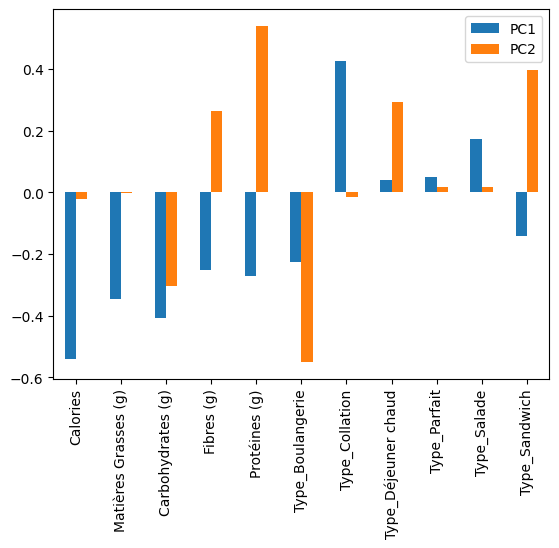

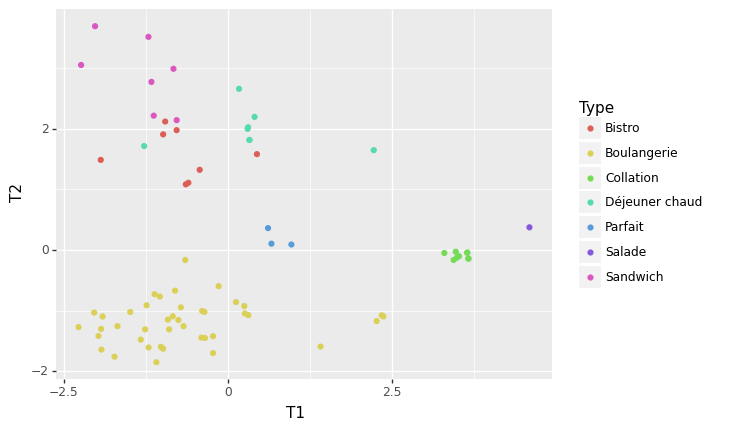


--------------------------


In [132]:
#do_pca(stdDfX, pClass=dfY, pColor = 'Type')
do_pca(stdDfX, pClass=dfX['Type'], pColor = 'Type')
#do_pca(concatDf,  pClass=dfY, pColor = 'Type')

/*******************/
Q2.3 ---> 
La composante T2 est meilleure pour discriminer (Boulangerie vs le reste) et (Sandwich vs le reste)
La composante T1 est meilleure pour discriminer (Salade vs le reste)

/*****************/